# Vibraciones Transversales de una cuerda fija en sus extremos

- Ana Esmeralda Rodriguez Rodriguez
- Alejandro de Anda Martín
- José Partida Padilla 

### Descripción
Analizar las oscilaciones que se presentan a lo largo de una cuerda que se encuentra fija en ambos extremos, determinar una relacion entre la lonjitud de onda y la longitud de la cuerda.

### Objetivo General
Determinar una relacion entre la lonjitud de onda y la longitud de la cuerda y con esto graficar las oscilaciones de una cuerda fija en ambos extremos.

### Objetivos Especificos
- Satisfacer la ecuación de d' Alambert unidimencional. 
- determinar una relacion entre la longitud de onda del modo "n" y la longitud "L" de la cuerda. 
- graficar la vibracion fundamental usando los armonicos n del 1 al 8.
- ubicar la posición y las velocidades iniciales de la cuerda.


### Modelo que representa el problema 
satisfacer la ecuación d' Alambert unidimencional:
$$ \frac{\partial^2 y}{\partial t^2} - c^2 \frac{\partial^2 y}{\partial x^2} = 0  $$

donde "c" es la velocidad de propagación que se relaciona a la tensión T y a la masa por unidad de longitud μ por
1/2 c=(T/μ) .

$ y(x,t) = \sum (a_n \cos\omega_n t + b_n \sin \omega_n t)\sin\frac{\omega_n}{c}x $    


con $ \omega_n = n\omega_1  $ donde: $ n\omega_1 = \frac{\pi c}{L} $ es la frecuencia angular del modo fundamental n=1 y $ a_n $ y $ b_n $ son constantes que se
pueden determinar con las condiciones iniciales en $t = 0$

La frecuencia de oscilación $f_n$ se relaciona entonces con las características de la cuerda por  

$f_n = \frac{n c}{2L} = \frac{n}{2L}\sqrt\frac{T}{\mu} $

En t = 0, el desplazamiento y la velocidad transversales de la cuerda están dados respectivamente por:

$ y(x,0)= \sum a_n \sin\frac{\omega_n}{c}x $

$ \frac{\partial y}{\partial t} (x,0) = \sum \omega_n b_n \sin\frac{\omega_n}{c}x $

Para obtener los coeficientes $a_n$ y $b_n$, se multiplican las
expresiones (4) y (5) por sen$\frac{\omega_n x}{c}$ y se integra de 0 a L.

$ a_n = \frac{2}{L} \int_0^L y(x,0)\sin\frac{\omega_n x}{c}dx   $

$ b_n = \frac{2}{n\pi c} \int_0^L \frac{\partial y}{\partial t}(x,0)\sin\frac{\omega_n x}{c}dx   $

### Simulaciones
siguiendo las ecuaciones que utilizamos para el modelo, pudimos obtener la grafica de cada una de las oscilaciones n (armonicos del 1 al 8)

In [3]:
from sympy import init_printing; init_printing(use_latex='mathjax')
from sympy import*
import sympy as sym
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import *
from scipy import special

In [4]:
var('t')

t

In [5]:
sym.var('x c n w', real = True)

(x, c, n, w)

In [6]:
def wn(n, w1):
    return n*w1

In [6]:
[wn(n, 151.75) for n in range(8)]

[0.0, 151.75, 303.5, 455.25, 607.0, 758.75, 910.5, 1062.25]

In [13]:
def an(n):
    return [2*(sym.Integral(.01* sym.sin((wn(n+1, 151.75))*x/48.30), (x,0,1))).doit() for n in range(n)]

In [18]:
def bn(n):
    return [(2/(n+1*sym.pi*48.3))*(sym.Integral(.01* sym.sin((wn(n+1, 151.75))*x/48.30), (x,0,1))).doit() for n in range(n)]
    

In [9]:
suma = Sum(an(8)[1]*sym.cos(wn(1,151.75)*0)+ bn(8)[1]*sym.sin(wn(1,151.75)*0)*sym.sin(wn(1,151.75)/48.30)*x, (n,1,100)); suma   

 100                    
 ___                    
 ╲                      
  ╲   0.0127314660600081
  ╱                     
 ╱                      
 ‾‾‾                    
n = 1                   

In [10]:
d = suma.evalf();d

1.27314660600081

In [21]:
def sm(w):
    return [Sum(an(8)[w+1]*sym.cos(wn(1,151.75)*0)+ bn(8)[w+1]*sym.sin(wn(1,151.75)*0)*sym.sin(wn(w+1,151.75)/48.30)*x, (n,1,100)).evalf() for w in range(w)]

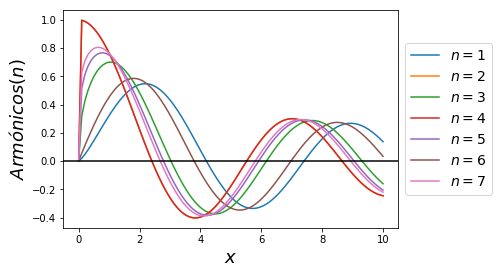

In [12]:
r = np.linspace(0, 10,100)
s1 = sm(8)[1]
plt.plot(r, special.jn(1.27314660600081, r), label = '${%s} = 1 $'%n)
plt.plot(r, special.jn(3.34678967699176*10**-8, r), label = '${%s} = 2 $'%n)
plt.plot(r, special.jn(0.424382157376409, r), label = '${%s} = 3 $'%n)
plt.plot(r, special.jn(6.69357900703882*10**-8, r), label = '${%s} = 4 $'%n)
plt.plot(r, special.jn(0.254629240877218, r), label = '${%s} = 5$'%n)
plt.plot(r, special.jn(1.00403676280177**-7, r), label = '${%s} = 6 $'%n)
plt.plot(r, special.jn(0.181877971824493, r), label = '${%s} = 7$'%n)
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$Armónicos(n)$', fontsize = 18)
plt.axhline(y = 0, color = 'k')                    # Para graficar lineas horizontales
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 14})
plt.show()

## Conclusiones

El modelo y las aproximaciones que se han hecho simplifican mucho los cálculos y permiten explicar parte de los fenómenos observados. 
 
Dado que la cuerda está fija en sus dos extremos, se puede determinar una relación entre la longitud de onda del modo n y la longitud L de la cuerda
 
Se puede ver con estas expresiones, que posición y velocidad iniciales de la cuerda determinan completamente su espectro de vibración
 
Estas vibraciones se transmiten integralmente al aire en forma de sonido y representan también el espectro sonoro de la cuerda, es decir su timbre. Numerosos factores, además de la composición, de la longitud y de la tensión, van a influir sobre el contenido del sonido, en particular, el ataque.
 

### Bibliografia

Michel Picquart, Lidia Jiménez. (2010). Estudio simplificado del timbre de cuerdas percutidas, punzadas y pulsadas. México, DF, México: Edvcatio physiorvm.